In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


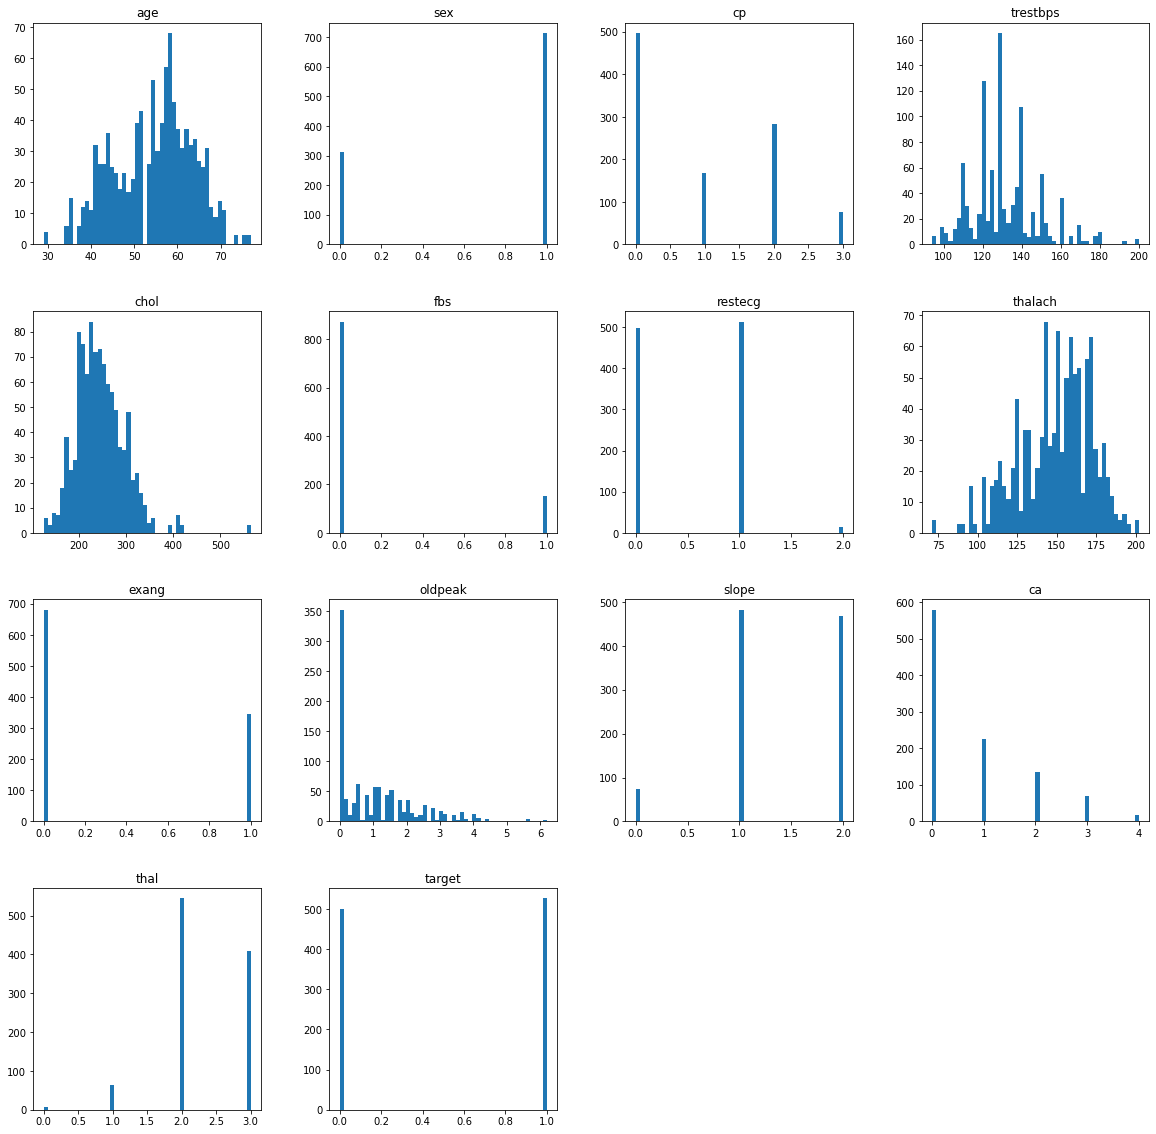

In [7]:
df.hist(bins=50,figsize=(20,20),grid=False);

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ", 
             "2. People of which sex has most heart disease?",
             "3. People of which sex has which type of chest pain most?",
             "4. People with which chest pain are most pron to have heart disease?",
             "5. Age vs Maximum heart rate when people have heart disease.",
             "6. Age vs Maximum heart rate when people doesn't have heart disease.",
             "7. Age vs serum cholestoral when people have heart disease.",
             "8 Age vs serum cholestoral when people doesn't have heart disease.",
             "9. People of which sex has more exercise induced angina?",
             "10. Which sex of people has more fasting blood sugar > 120 mg/dl?"
            ]

In [10]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [11]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0, 0.5, 'amount')

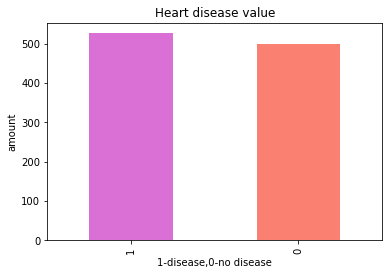

In [12]:
df.target.value_counts().plot(kind='bar',color=['orchid','salmon'])
plt.title('Heart disease value')
plt.xlabel('1-disease,0-no disease')
plt.ylabel('amount')

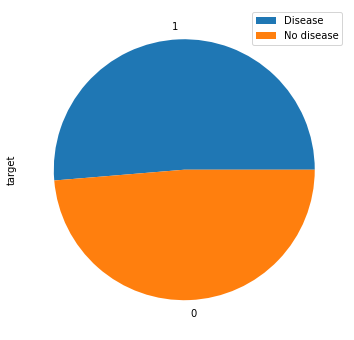

In [13]:
df.target.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(['Disease','No disease'])
plt.show()

In [14]:
pd.crosstab(df['target']==1,df['sex'])

sex,0,1
target,,
False,86,413
True,226,300


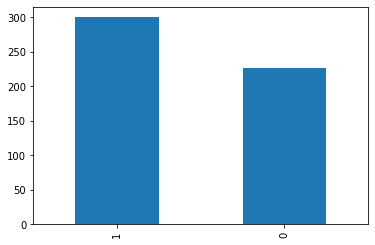

In [15]:
df[df['target']==1]['sex'].value_counts().plot(kind='bar')
plt.show()

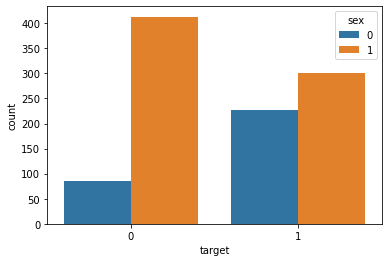

In [16]:
sns.countplot(x='target',data=df,hue='sex')
plt.show()

In [17]:
df.cp.max()

3

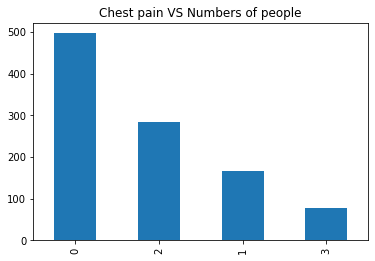

In [18]:
df['cp'].value_counts().plot(kind='bar')
plt.title("Chest pain VS Numbers of people")
plt.show()

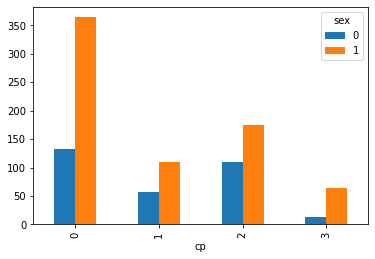

In [19]:
pd.crosstab(df['cp'],df['sex']).plot(kind='bar')
plt.show()

In [20]:
pd.crosstab(df.ca ,df.target)

target,0,1
ca,,
0,163,415
1,160,66
2,113,21
3,60,9
4,3,15


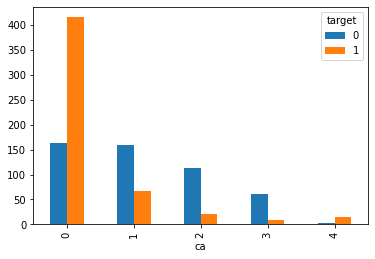

In [21]:
pd.crosstab(df.ca ,df.target).plot(kind='bar')
plt.show()

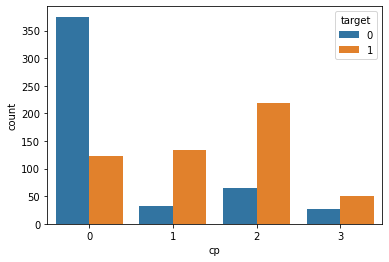

In [22]:
sns.countplot(x='cp',data=df,hue='target')
plt.show()

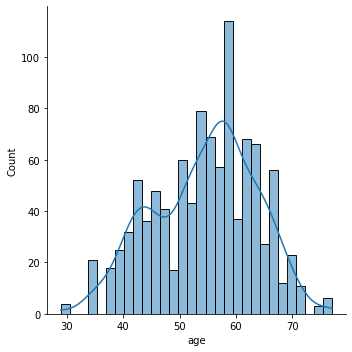

In [23]:
sns.displot(x='age',data=df,bins=30,kde=True)
plt.show()

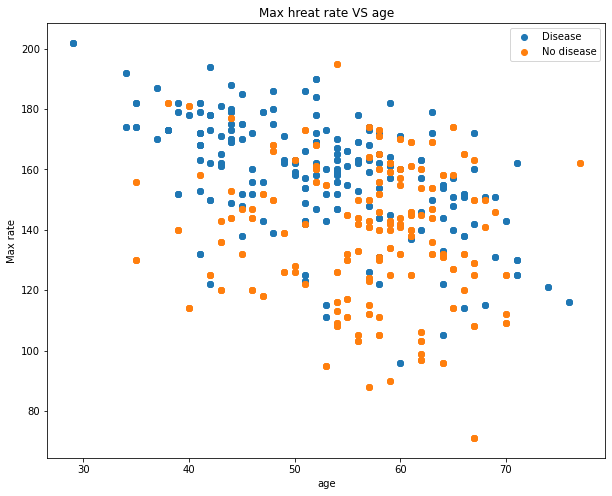

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])
plt.scatter(df.age[df.target==0],df.thalach[df.target==0])
plt.legend(['Disease','No disease'])
plt.title("Max hreat rate VS age")
plt.xlabel('age')
plt.ylabel('Max rate')
plt.show()

In [26]:
df.age[df.target==1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

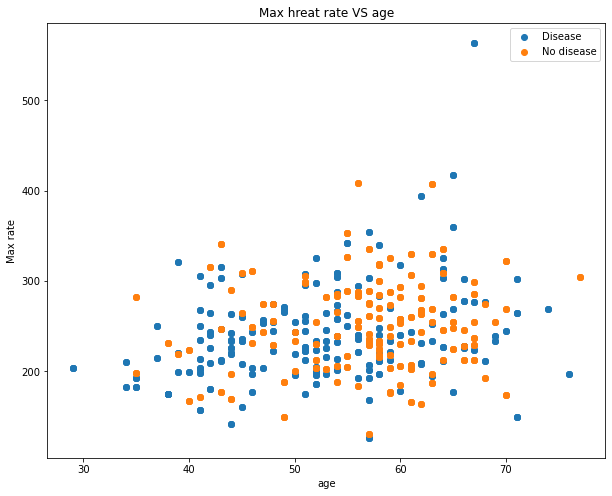

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],df.chol[df.target==1])
plt.scatter(df.age[df.target==0],df.chol[df.target==0])
plt.legend(['Disease','No disease'])
plt.title("Max hreat rate VS age")
plt.xlabel('age')
plt.ylabel('Max rate')
plt.show()

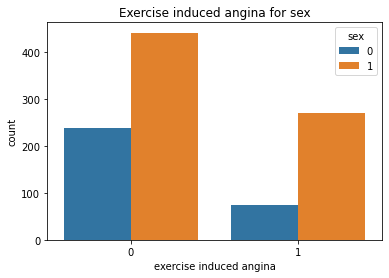

In [34]:
sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
plt.xlabel('exercise induced angina');

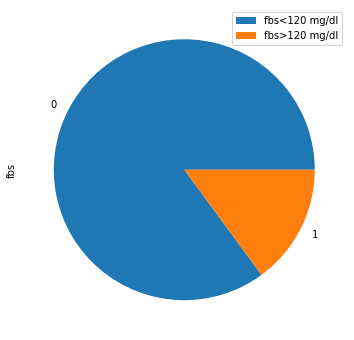

In [35]:
df.fbs.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(['fbs<120 mg/dl', 'fbs>120 mg/dl']);

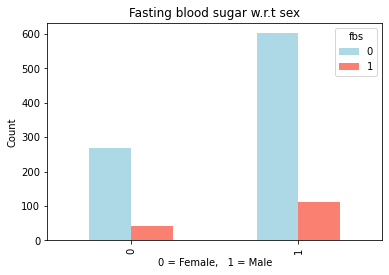

In [36]:
pd.crosstab(df.sex, df.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
plt.xlabel("0 = Female,   1 = Male")
plt.ylabel("Count");